# PRACTICA USO DE LA IA
## Modulo: Uso de la IA - Prompting Avanzado
### Profesor: Marc Mayol Orell

# Ejercicio 1: Crea un Prompt
*Descripción*: Identifica una tarea repetitiva de tu vida o trabajo que
la IA pueda simplificar (por ejemplo, crear publicaciones en
LinkedIn) y crea un prompt o conjunto de prompts para resolver
dicha tarea. En este ejercicio se pretende llevar a la práctica las
técnicas de prompting vistas durante las clases para que las
puedas interiorizar.

# Prompt:
Actúa como si fueras un especialista en contratación de recursos humanos de una empresa líder en el sector de la IA. Para ayudarme a actualizar mi perfil de "linkedln" "www.linkedin.com/in/casi-aunión-castillo-7b674a108" y crear publicaciones que cumplan estos requisitos:
1. Quiero encortar trabajo y cambiar de sector de empleo para encontrar algo relacionado con el "Bootcamp en Inteligencia Artificial Full Stack de keepcoding", que estoy realizando en este momento y termino en marzo.
2. Busca información sobre dicho bootcamp para complementar la información.
3. Quiero que en las publicaciones hagas referencias a los módulos del bootcamp que ya he cursado y aprobado hasta el momento, actualmente acabo de cursar Uso de la IA o Prompting Avanzado.
4. Quiero que hagas referencia que quiero cambiar de sector profesional, porque me apasiona la ia y tengo ganas de seguir aprendiendo.
5. Proyecta me como una persona con capacidad de aprendizaje y esfuerzo, de trabajo, de superación para realizar cualquier tarea.
6. Redacta lo en un tono formal y técnico pero accesible.
7. Que el contenido este en Español de España.
8. Generame imagenes en formato jpg, para poder adjuntar al perfil y las publicaciones.
Te adjunto algun certificado de los módulos del bootcamp



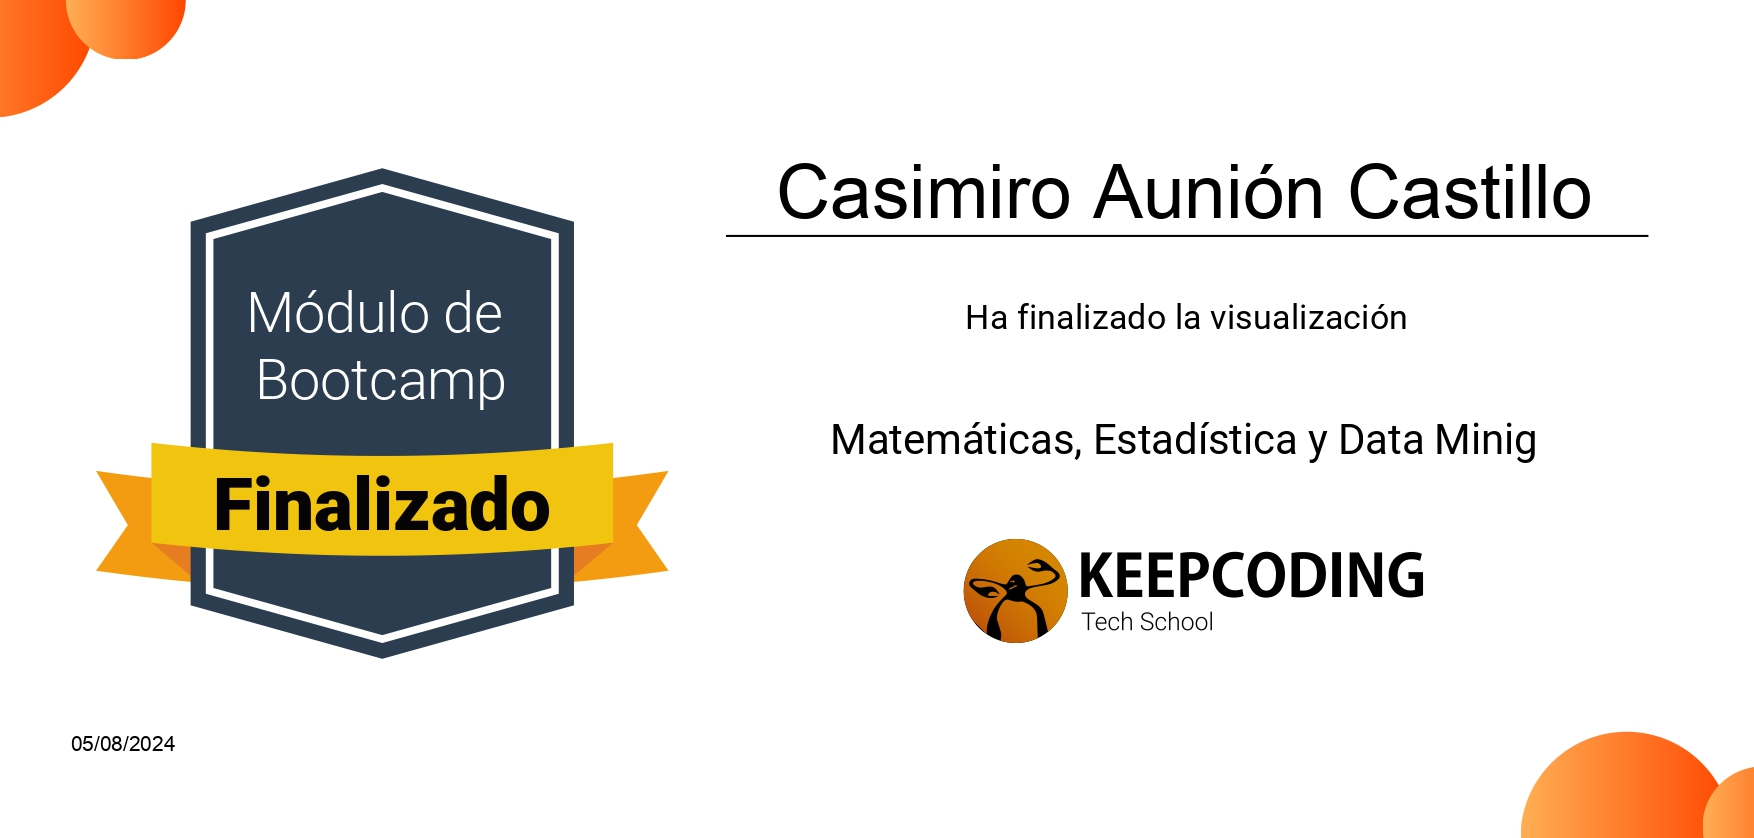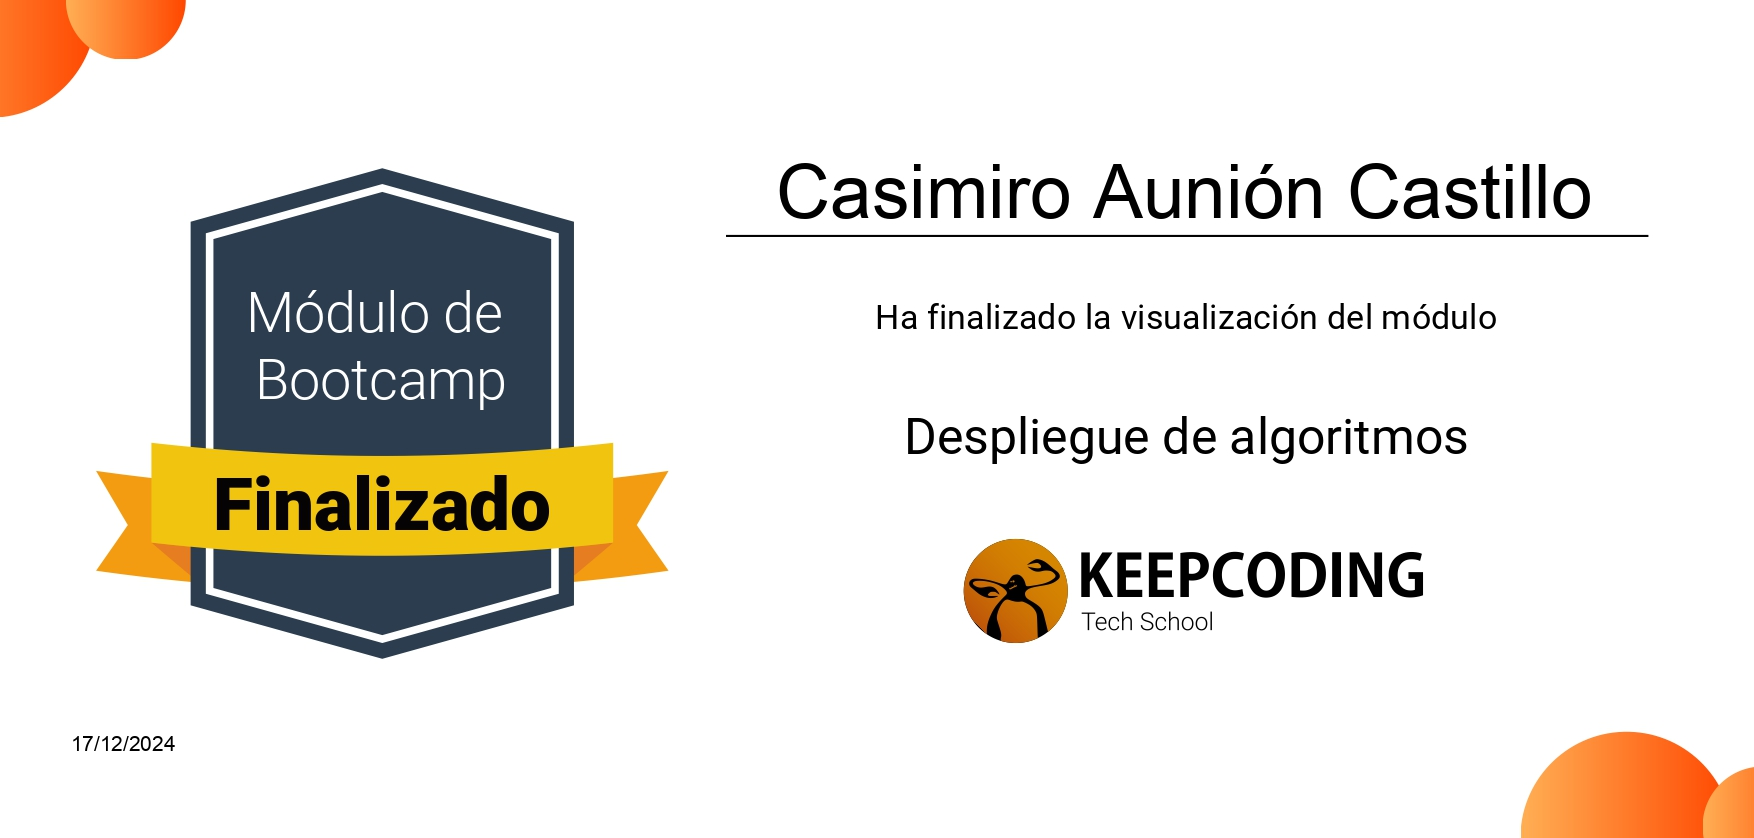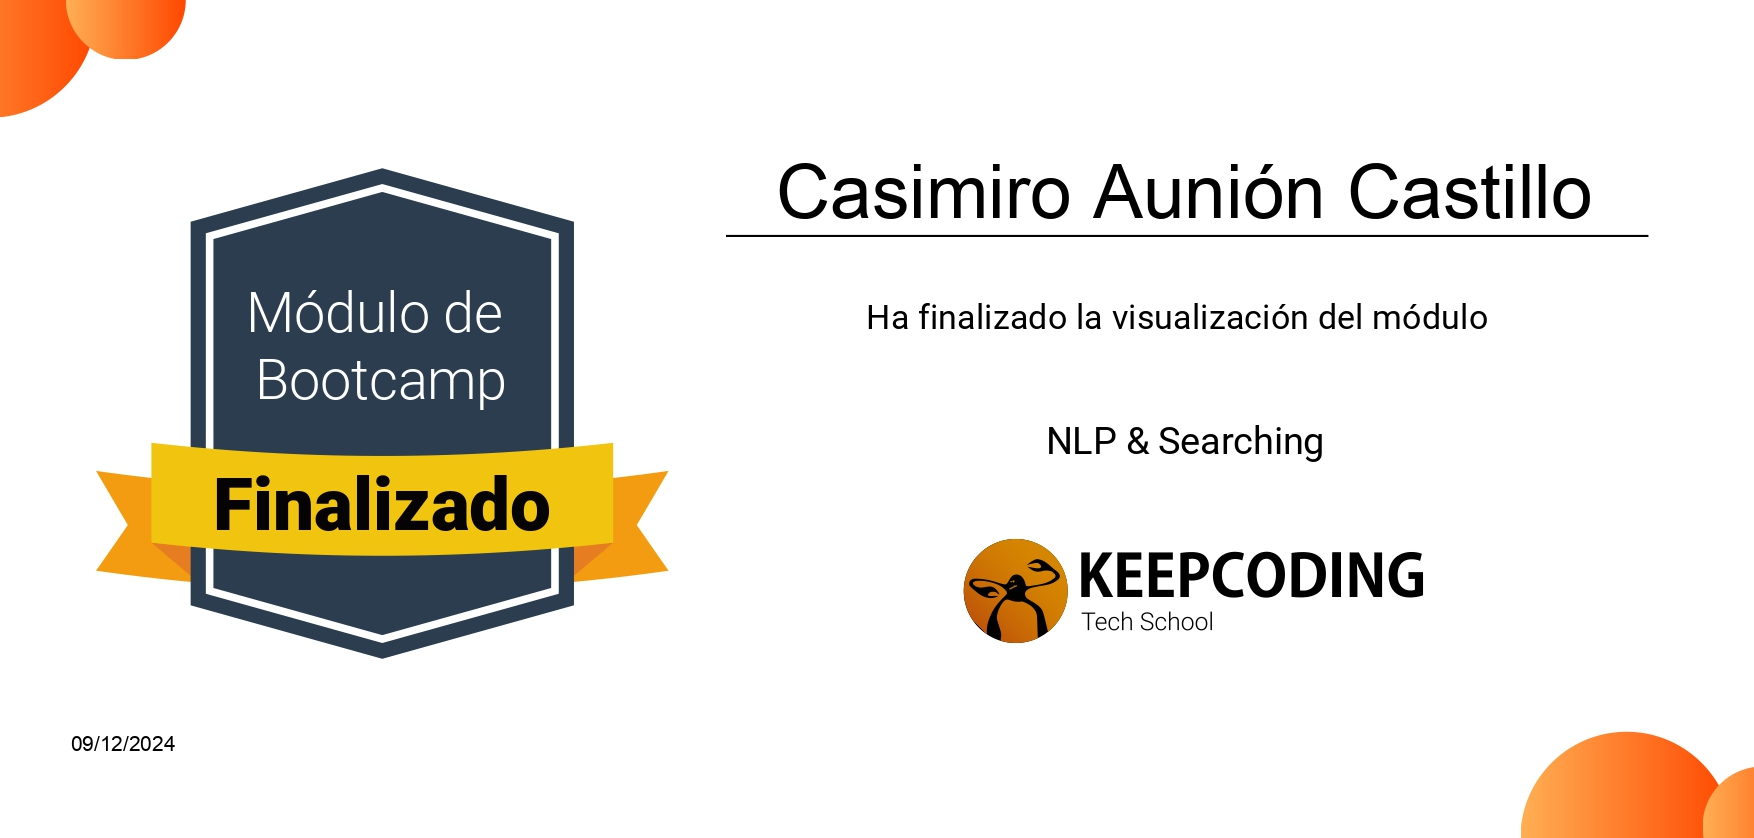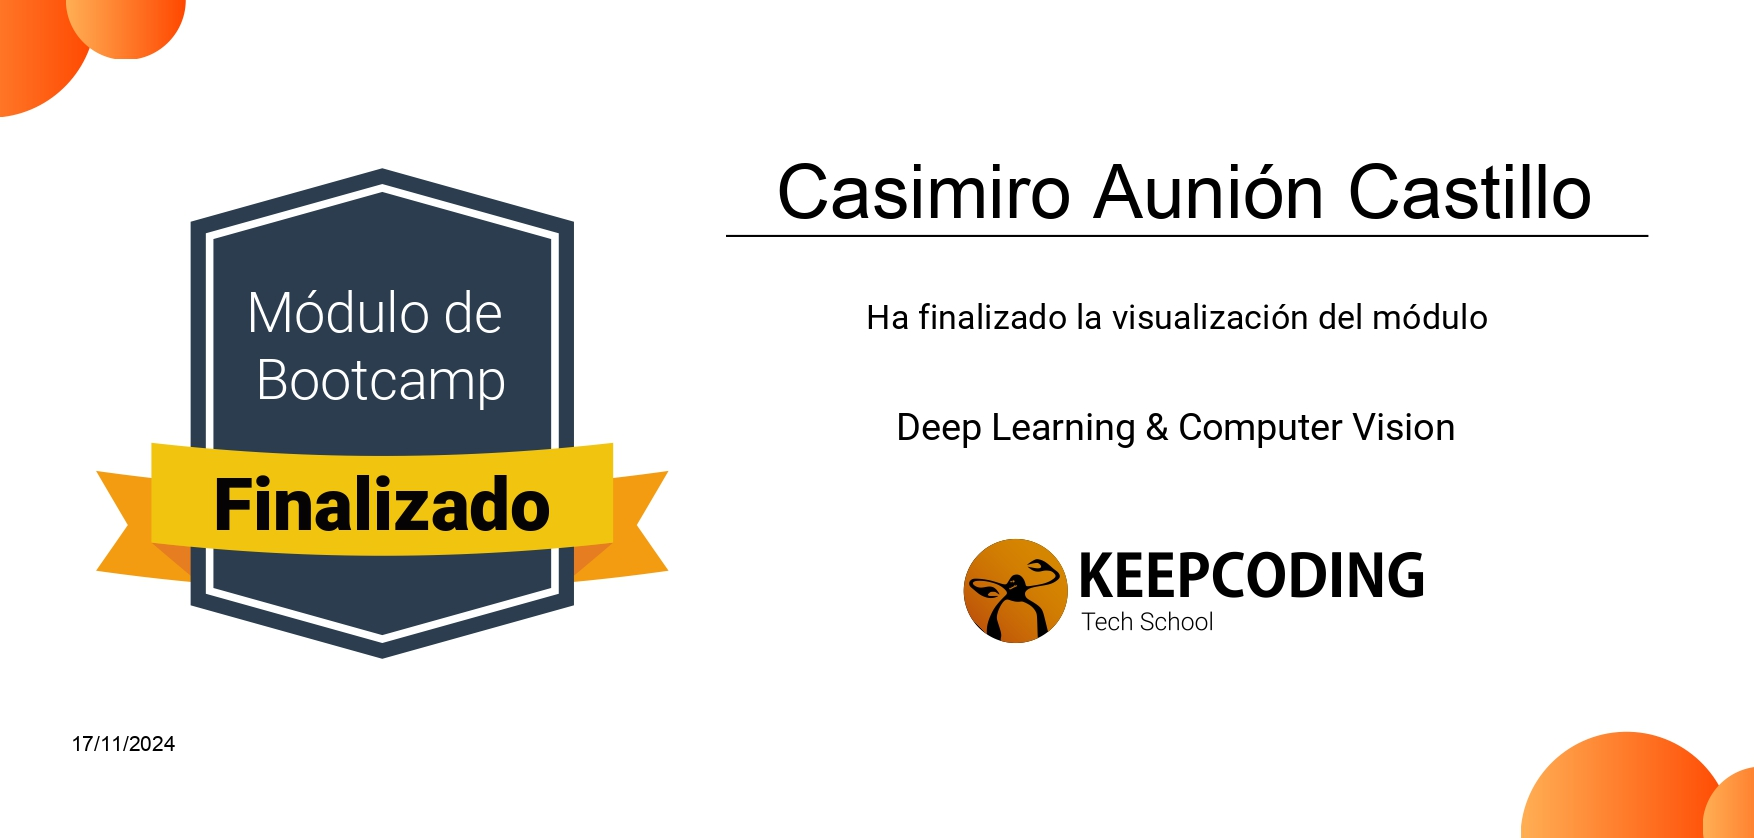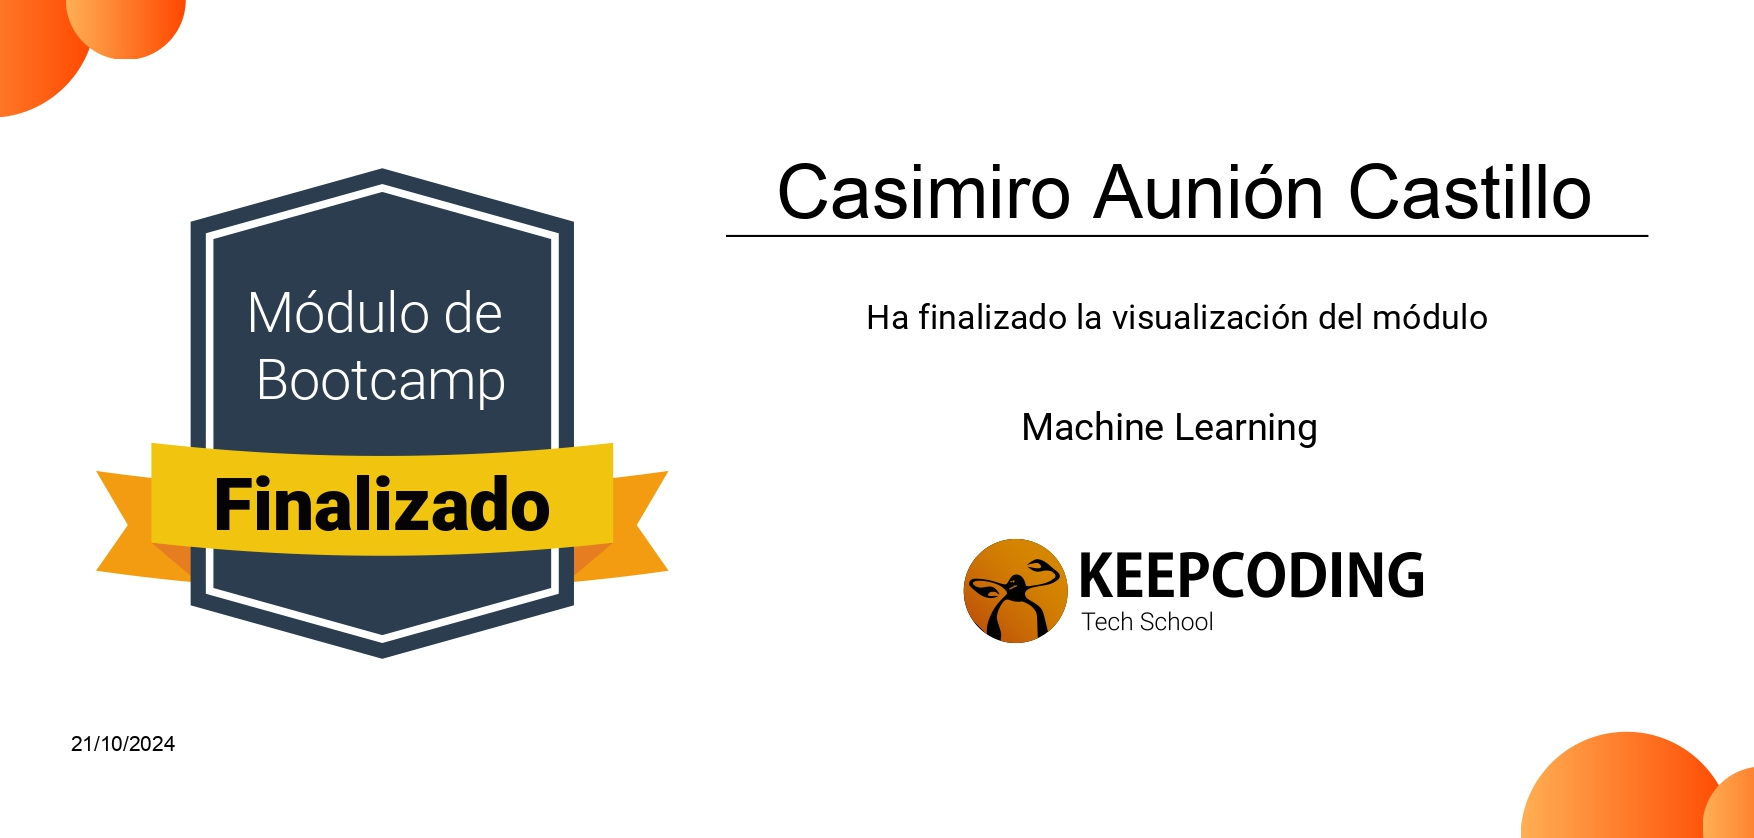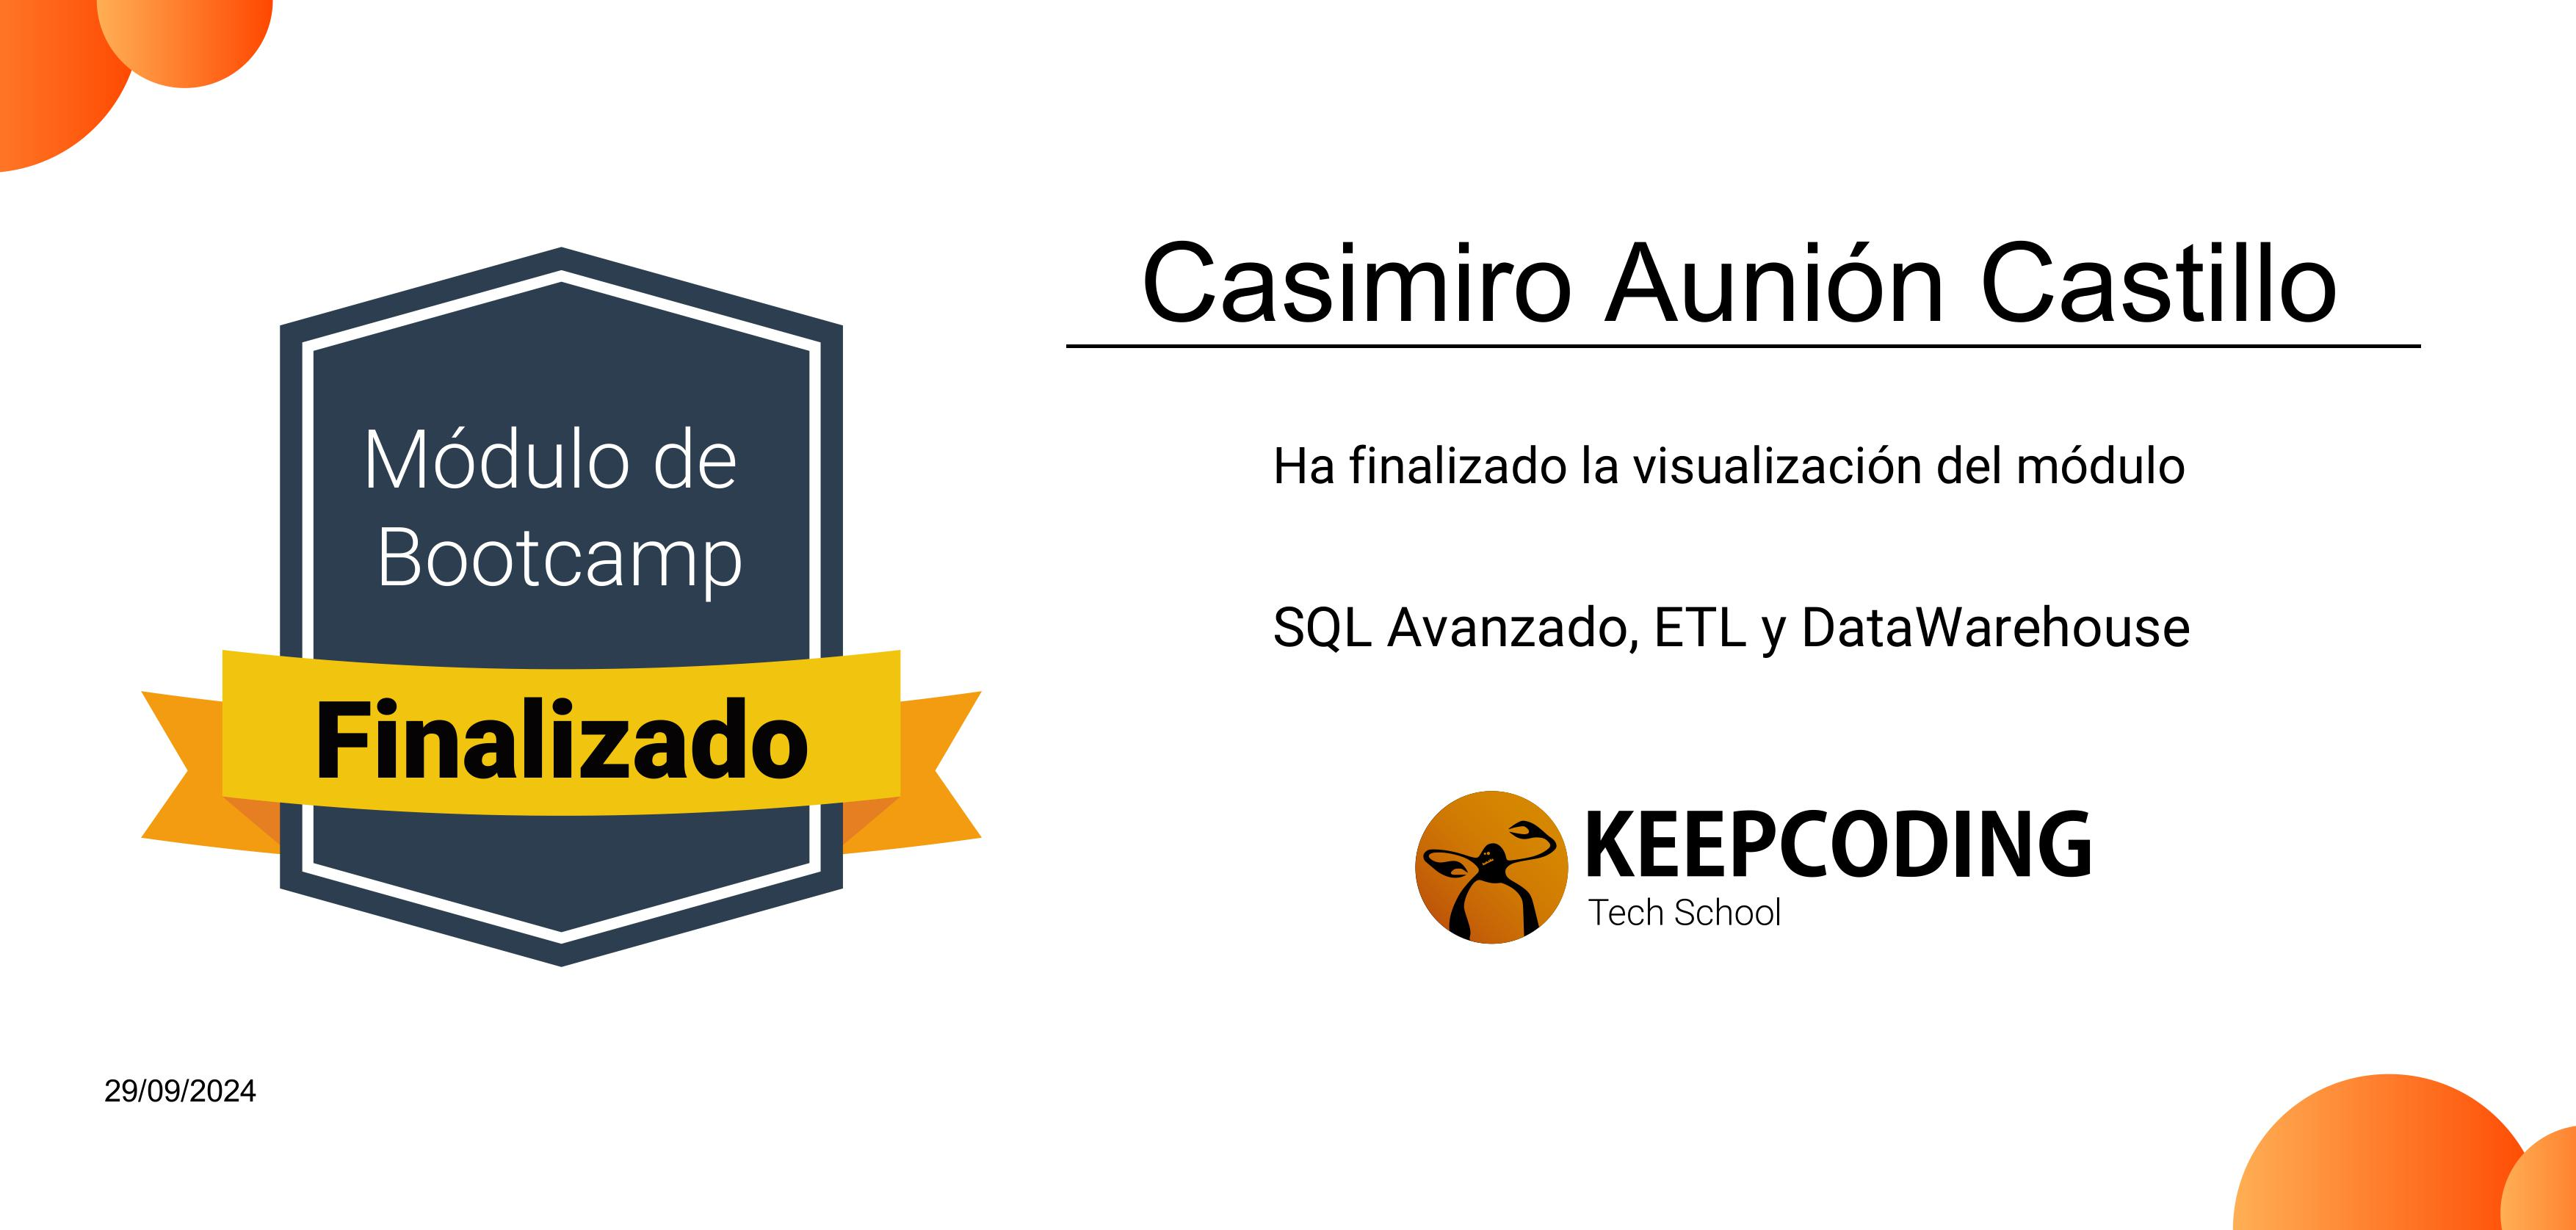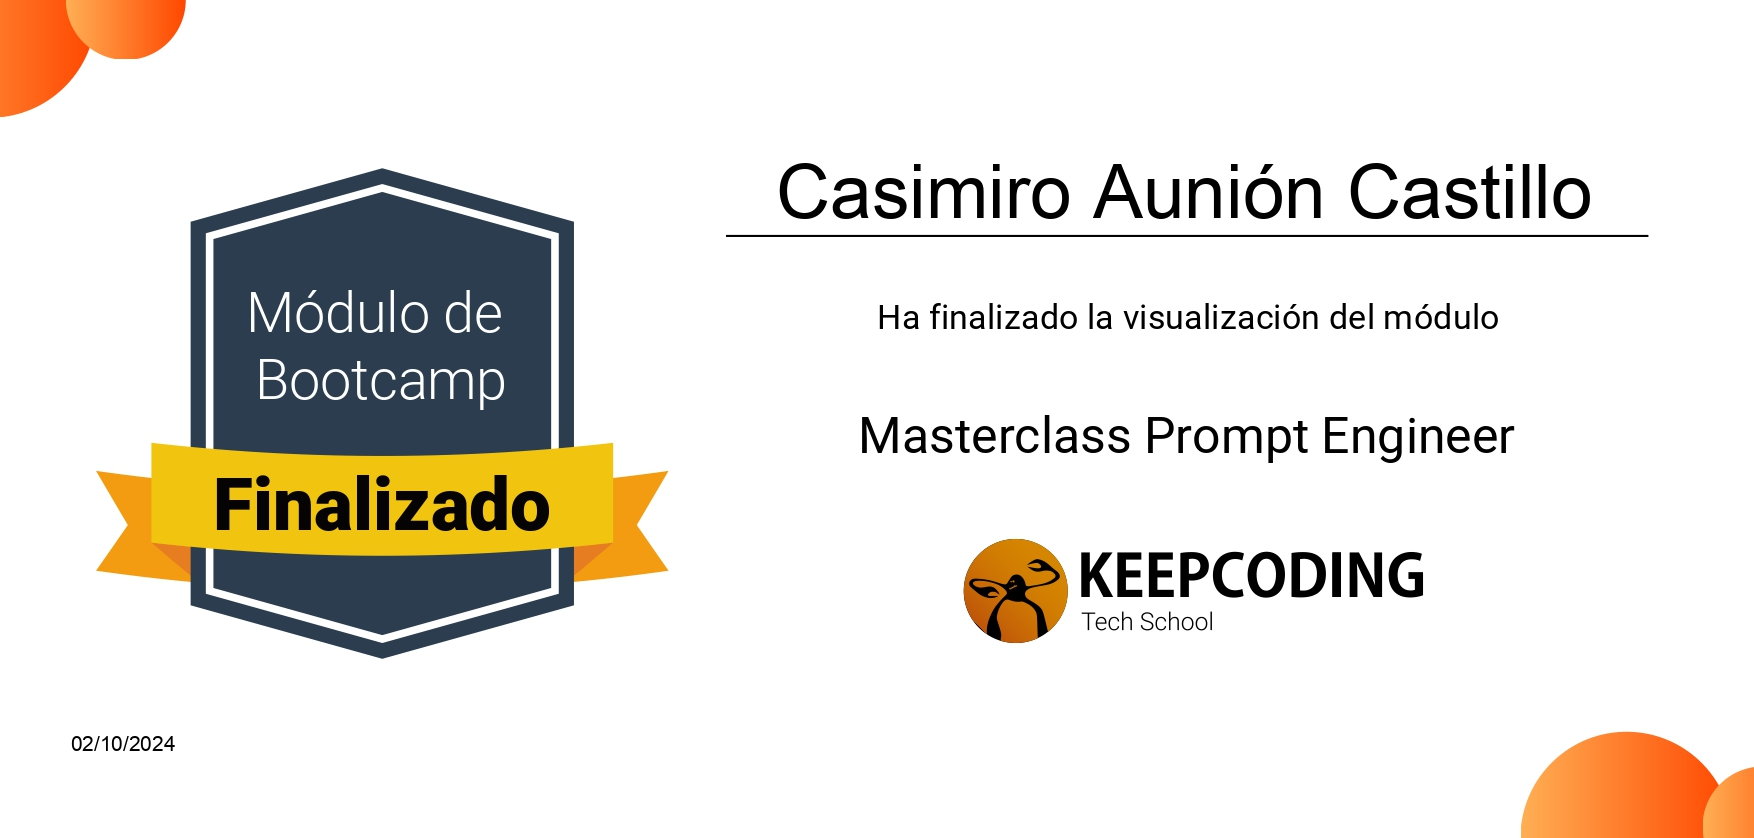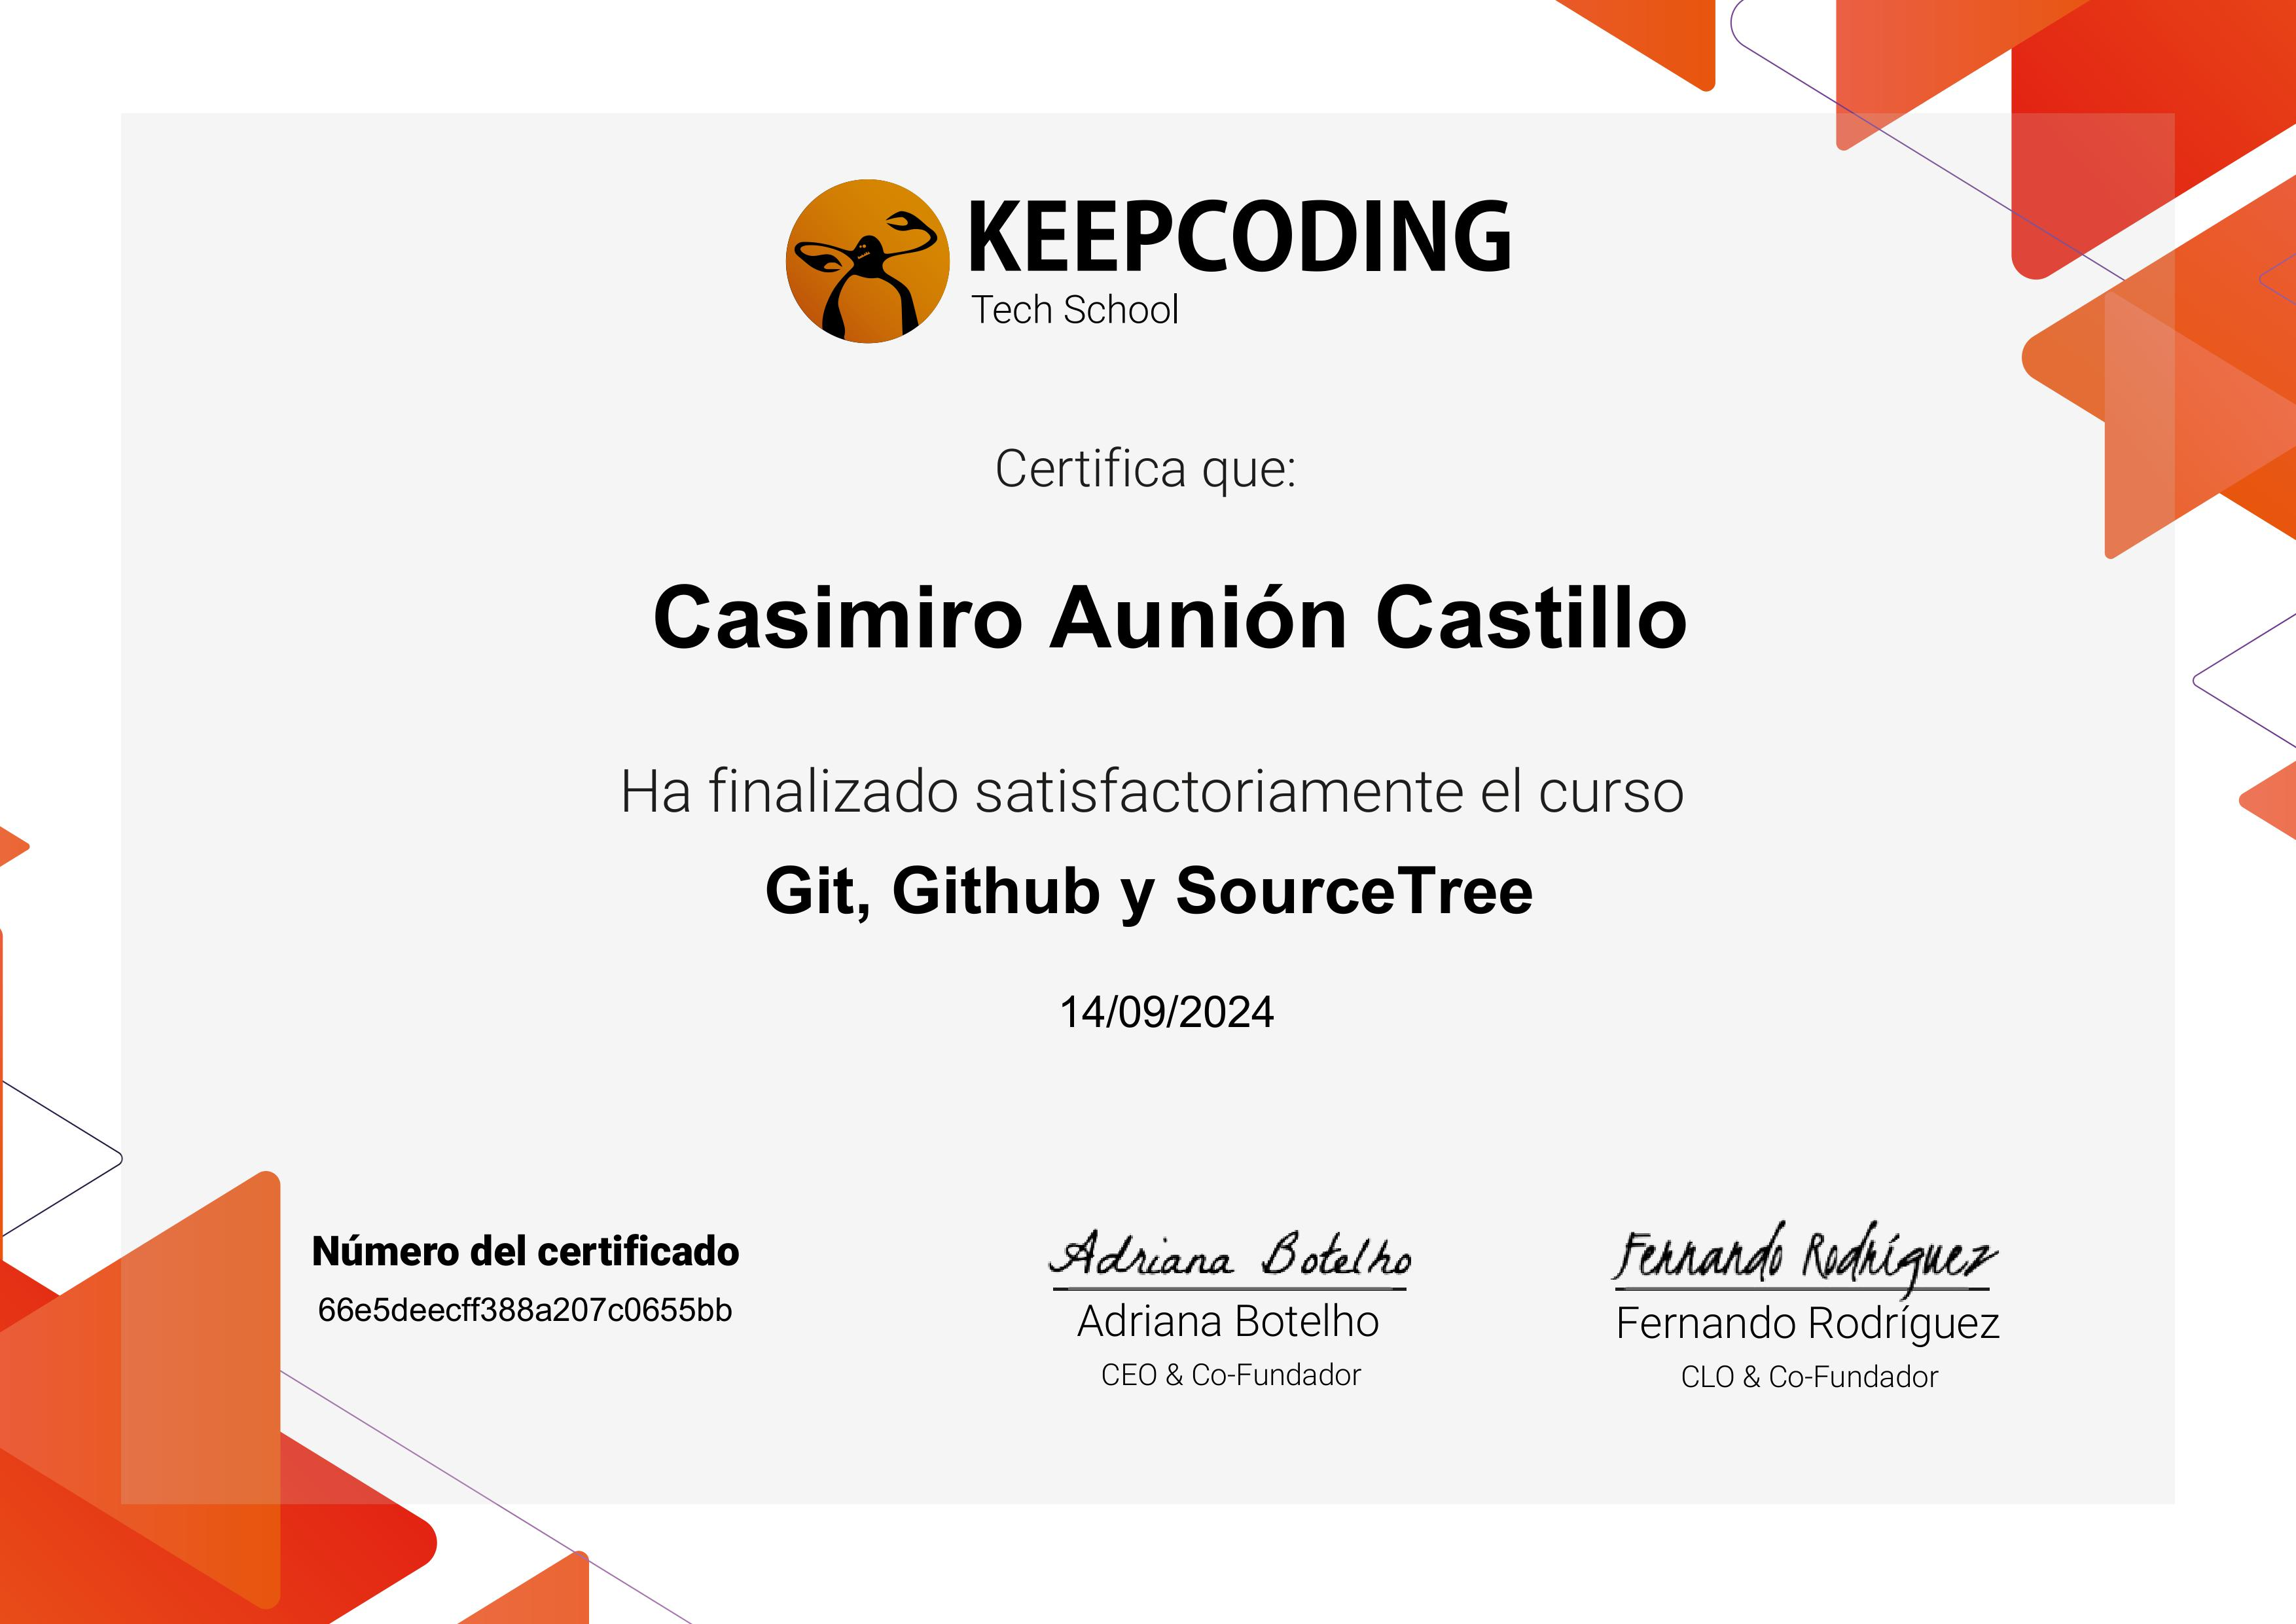

# Ejercicio 2: Desarrolla la solución al problema
*Descripción*: Desarrolla la solución al problema con LangChain y
tu IA favorita o OpenAI: escoge uno de los sistemas que hemos
aprendido en clase (LangChain o OpenAI) y crea un código que,
junto al prompt o prompts anteriores, solvente tu problema. En este
ejercicio se pretende practicar y asimilar la programación vista
durante las clases

#Langchain + open ai

In [30]:
pip install langchain langchain-openai

In [31]:
pip install langchain langchain-community

In [4]:
#pip uninstall openai -y

Found existing installation: openai 1.58.1
Uninstalling openai-1.58.1:
  Successfully uninstalled openai-1.58.1


In [32]:
pip install openai --upgrade

In [33]:
pip install ipywidgets

In [34]:
from google.colab import files

# Subir archivos
print("Por favor, sube las imágenes de los certificados (archivos JPG, JPEG, PNG, PDF).")
uploaded_files = files.upload()  # Devuelve un diccionario con los archivos subidos


Por favor, sube las imágenes de los certificados (archivos JPG, JPEG, PNG, PDF).


Saving certificate-git-github-y-sourcetree-647627f00ffc4684b1002192.jpg to certificate-git-github-y-sourcetree-647627f00ffc4684b1002192 (2).jpg
Saving certificate-keepcoding-bootcamp-inteligencia-artificial-full-stack-edicion-ii-66b211cf0c40c675a608632c.jpg to certificate-keepcoding-bootcamp-inteligencia-artificial-full-stack-edicion-ii-66b211cf0c40c675a608632c (2).jpg
Saving certificate-keepcoding-bootcamp-inteligencia-artificial-full-stack-edicion-ii-66b211d10c40c675a6086336_page-0001.jpg to certificate-keepcoding-bootcamp-inteligencia-artificial-full-stack-edicion-ii-66b211d10c40c675a6086336_page-0001 (2).jpg
Saving certificate-keepcoding-bootcamp-inteligencia-artificial-full-stack-edicion-ii-66b216849018612e4509ab1d_page-0001.jpg to certificate-keepcoding-bootcamp-inteligencia-artificial-full-stack-edicion-ii-66b216849018612e4509ab1d_page-0001 (2).jpg
Saving certificate-keepcoding-bootcamp-inteligencia-artificial-full-stack-edicion-ii-66b216859018612e4509ab29_page-0001.jpg to certi

In [35]:
import os
import openai
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.schema import HumanMessage
import requests

In [36]:
# Configuración de la API de OpenAI
openai.api_key = "api_key"

In [40]:
# Instancia del modelo de LangChain
chat = ChatOpenAI(
    temperature=0.5,
    model="gpt-4o",
    openai_api_key=openai.api_key
)

# Plantilla de prompt para generar contenido
prompt_template = PromptTemplate(
    input_variables=["certificados"],
    template="""
    Actúa como un especialista en contratación de recursos humanos de una empresa líder en el sector de la IA.
    Ayúdame a actualizar mi perfil de LinkedIn y crear publicaciones que cumplan con estos requisitos:
    1. Quiero encontrar trabajo y cambiar de sector de empleo hacia algo relacionado con el Bootcamp en Inteligencia Artificial Full Stack de KeepCoding, que termino en marzo.
    2. Los certificados subidos son ejemplos de módulos cursados: {certificados}.
    3. Quiero dejar claro que me apasiona la IA y tengo ganas de seguir aprendiendo.
    4. Proyecta mi perfil como una persona con capacidad de aprendizaje, esfuerzo, trabajo y superación.
    5. Redacta en un tono formal y técnico pero accesible.
    6. El contenido debe estar en español de España.
    """
)

# Procesar los archivos subidos
certificados_info = []

for filename in uploaded_files.keys():
    print(f"Archivo recibido: {filename}")
    certificados_info.append(filename)

# Crear el prompt
certificados_texto = ", ".join(certificados_info)
prompt = prompt_template.format(certificados=certificados_texto)

# Generar texto con LangChain
print("\nGenerando contenido...")
response = chat.invoke(input=prompt)
print("Texto generado:")
print(response)

# Obtener el contenido de la respuesta
response_text = response.content

# Generar imágenes para publicaciones
print("\nGenerando imágenes para publicaciones...")
publicaciones = response_text.split("\n\n")  # Dividir el contenido en publicaciones
for i, publicacion in enumerate(publicaciones):
    if publicacion.strip():
        # Crear un prompt para la imagen basado en la publicación
        image_prompt = f"""
        Crea una imagen representativa para la siguiente publicación: {publicacion[:150]}...
        La imagen debe ser profesional, moderna y reflejar innovación en inteligencia artificial.
        """
        try:
            # Generar la imagen con DALL-E
            image_response = openai.Image.create(
                prompt=image_prompt,
                n=1,
                size="1024x1024"
            )
            image_url = image_response['data'][0]['url']

            # Descargar la imagen generada
            image_filename = f"publicacion_{i+1}.jpg"
            image_data = requests.get(image_url).content
            with open(image_filename, "wb") as f:
                f.write(image_data)
            print(f"Imagen para publicación {i+1} guardada como {image_filename}")
        except Exception as e:
            print(f"Error al generar la imagen para publicación {i+1}: {e}")

print("\nTexto para LinkedIn y las imágenes están listas.")

Archivo recibido: certificate-git-github-y-sourcetree-647627f00ffc4684b1002192 (2).jpg
Archivo recibido: certificate-keepcoding-bootcamp-inteligencia-artificial-full-stack-edicion-ii-66b211cf0c40c675a608632c (2).jpg
Archivo recibido: certificate-keepcoding-bootcamp-inteligencia-artificial-full-stack-edicion-ii-66b211d10c40c675a6086336_page-0001 (2).jpg
Archivo recibido: certificate-keepcoding-bootcamp-inteligencia-artificial-full-stack-edicion-ii-66b216849018612e4509ab1d_page-0001 (2).jpg
Archivo recibido: certificate-keepcoding-bootcamp-inteligencia-artificial-full-stack-edicion-ii-66b216859018612e4509ab29_page-0001 (2).jpg
Archivo recibido: certificate-keepcoding-bootcamp-inteligencia-artificial-full-stack-edicion-ii-66b216869018612e4509ab33_page-0001 (2).jpg
Archivo recibido: certificate-keepcoding-bootcamp-inteligencia-artificial-full-stack-edicion-ii-66b216879018612e4509ab39_page-0001 (2).jpg
Archivo recibido: certificate-matematicas-101-edicion-i- IA Modulos Transversales Estadis

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-proj-******************************************************************************************************************************************************L0gA. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}